In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

Теперь мы знаем, как работает алгоритм k-means, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации k-means, нам нужна библиотека sklearn и модуль KMeans.

Что необходимо для запуска?

Обязательно задать количество кластеров, на которые необходимо разделить данные.
Данные, т. е. параметры объектов (xi), которые мы будем передавать в виде матрицы наблюдений X.
После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

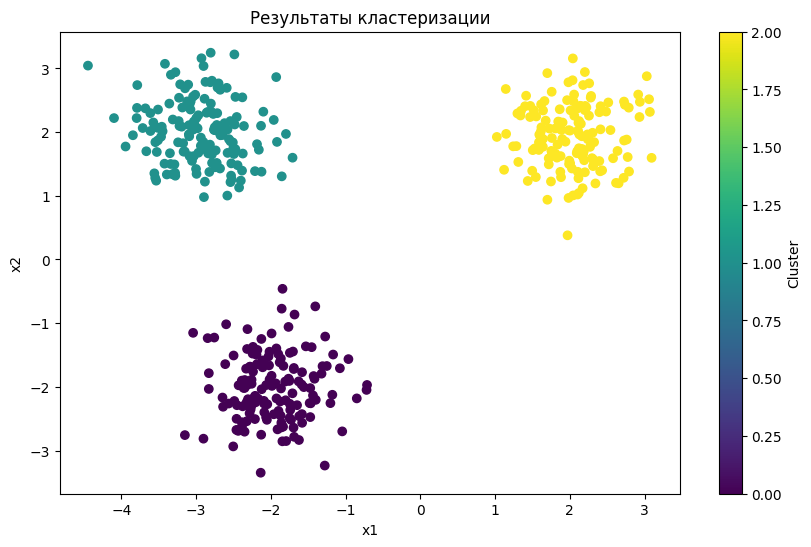


Центры кластеров:
         x1        x2        x3
0 -1.969205 -2.012220 -1.985361
1 -2.936336  2.010327  2.033037
2  2.036194  1.938503  2.047243


In [14]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# Создаем синтетические данные для примера
np.random.seed(42)
n_samples = 300

# Создаем два кластера
cluster1 = np.random.normal(loc=[2, 2, 2], scale=0.5, size=(n_samples//2, 3))
cluster2 = np.random.normal(loc=[-2, -2, -2], scale=0.5, size=(n_samples//2, 3))

cluster3 = np.random.normal(loc=[-3, 2, 2], scale=0.5, size=(n_samples//2, 3))

# Объединяем кластеры
X = np.vstack([cluster1, cluster2, cluster3])

# Создаем DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])


# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
#X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(df)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_


# Визуализация результатов (для первых двух признаков)
plt.figure(figsize=(10, 6))
plt.scatter(df['x1'], df['x2'],  c=labels, cmap='viridis')
plt.title('Результаты кластеризации')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Cluster')
plt.show()

# Центры кластеров
print("\nЦентры кластеров:")
centers = pd.DataFrame(k_means.cluster_centers_, columns=['x1', 'x2', 'x3'])
print(centers)

In [15]:
fig = px.scatter_3d(
    df, 
    x='x1', 
    y='x2', 
    z='x3',
    color=labels,
    title='Результаты кластеризации (3D)',
    labels={'color': 'Кластер'},
    color_continuous_scale='viridis'
)

# Добавляем центры кластеров
fig.add_scatter3d(
    x=centers['x1'],
    y=centers['x2'],
    z=centers['x3'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name='Центры кластеров'
)

fig.show()

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:

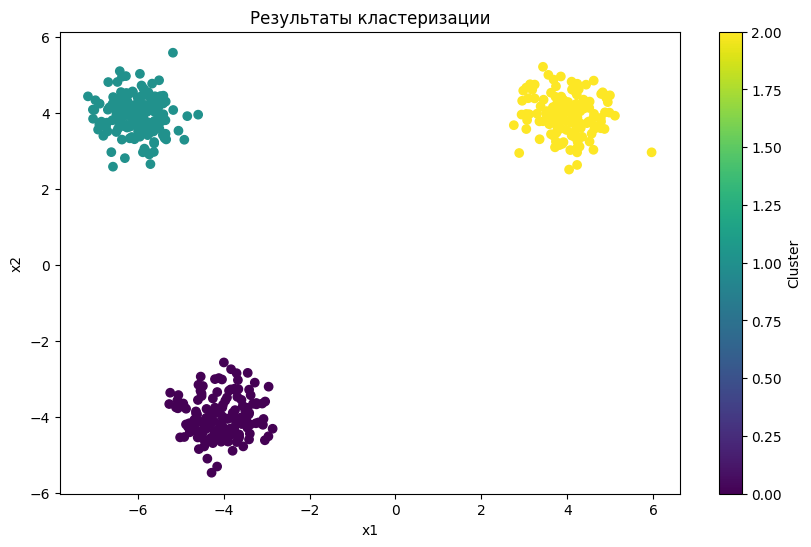


Центры кластеров:
         x1        x2        x3
0 -1.969205 -2.012220 -1.985361
1 -2.936336  2.010327  2.033037
2  2.036194  1.938503  2.047243


In [18]:
# Создаем 3 новых кластера
cluster4 = np.random.normal(loc=[4, 4, 4], scale=0.5, size=(n_samples//2, 3))
cluster5 = np.random.normal(loc=[-4, -4, -4], scale=0.5, size=(n_samples//2, 3))

cluster6 = np.random.normal(loc=[-6, 4, 4], scale=0.5, size=(n_samples//2, 3))

# Объединяем кластеры
X_new = np.vstack([cluster4, cluster5, cluster6])

# Создаем DataFrame
df2 = pd.DataFrame(X_new, columns=['x1', 'x2', 'x3'])


X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

labels2 = k_means.labels_


# Визуализация результатов (для первых двух признаков)
plt.figure(figsize=(10, 6))
plt.scatter(df2['x1'], df2['x2'],  c=labels, cmap='viridis')
plt.title('Результаты кластеризации')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Cluster')
plt.show()

# Центры кластеров
print("\nЦентры кластеров:")
centers2 = pd.DataFrame(k_means.cluster_centers_, columns=['x1', 'x2', 'x3'])
print(centers2)

In [19]:
fig = px.scatter_3d(
    df2, 
    x='x1', 
    y='x2', 
    z='x3',
    color=labels2,
    title='Результаты кластеризации (3D)',
    labels={'color': 'Кластер'},
    color_continuous_scale='viridis'
)

# Добавляем центры кластеров
fig.add_scatter3d(
    x=centers2['x1'],
    y=centers2['x2'],
    z=centers2['x3'],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name='Центры кластеров'
)

fig.show()

In [21]:
X_sample = pd.DataFrame([[1, 2, 3]])
k_means.predict(X_sample)

c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([2], dtype=int32)